In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_distances = pd.read_csv(r'.\\FULLDATASET.csv')

X = df_distances.loc[:, 'Distance (1 to 2)':'Distance (67 to 68)']
y = df_distances['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2024)

print(X.shape)


(46, 2278)


explained variance by each PC:  [8.94524250e-01 4.73523173e-02 1.80758003e-02 8.22756777e-03
 6.08408334e-03 4.04464708e-03 3.73990876e-03 3.09903333e-03
 2.07768784e-03 1.57646174e-03 1.20785837e-03 1.06423186e-03
 9.60982189e-04 9.22714357e-04 7.59762024e-04 7.07821901e-04
 6.55269943e-04 5.83341632e-04 5.19460675e-04 3.90773309e-04
 3.63067076e-04 3.26686783e-04 3.15787374e-04 2.60156385e-04
 2.29581549e-04 2.27897731e-04 1.94389650e-04 1.89306673e-04
 1.55783630e-04 1.34464168e-04 1.25647152e-04 1.21514024e-04
 1.04303606e-04 9.90582357e-05 8.84324243e-05 7.86971152e-05
 7.28097215e-05 5.84259954e-05 5.60848540e-05 5.31795861e-05
 4.77748072e-05 4.21242434e-05 3.38855025e-05 2.94715205e-05
 1.74961368e-05 1.76413802e-31]


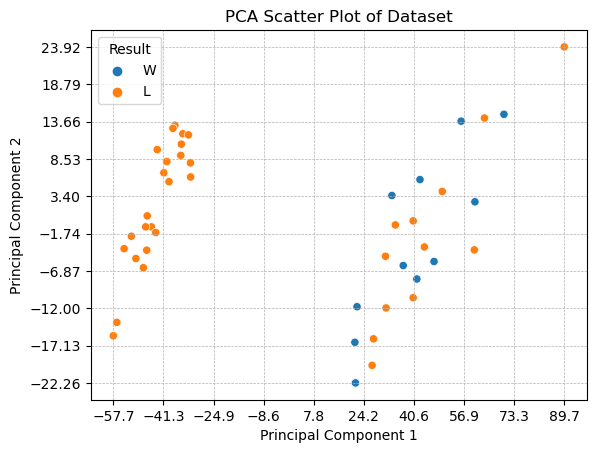

Index([14, 25, 26, 45, 40, 34, 23, 18, 28, 30, 44, 36], dtype='int64')


C:\Users\tomas\AppData\Local\Temp\ipykernel_36072\2039379934.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(X_train[(X_pca[:, 1] > 5) & (y == "L")].index)


In [81]:
# USE PCA TO PLOT FEATURES

# Normalize all distances as a ratio of the first distance
# Normalize X_train
X_train_norm = X_train.div(X_train.iloc[:, 0], axis=0)
# Normalize X_test 
X_test_norm = X_test.div(X_test.iloc[:, 0], axis=0)
# Normalize full X
X_norm = X.div(X.iloc[:, 0], axis=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_norm)
X_test_scaled = scaler.transform(X_test_norm)
X_scaled = scaler.transform(X_norm)


# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print('explained variance by each PC: ', pca.explained_variance_ratio_)


# plotting
import seaborn as sns
# scatter plot
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)

# Define the range for ticks
x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max()
y_min, y_max = X_pca[:, 1].min(), X_pca[:, 1].max()

# Create more ticks (adjust step size as needed)
x_ticks = np.linspace(x_min, x_max, 10)  # 10 ticks along x-axis
y_ticks = np.linspace(y_min, y_max, 10)  # 10 ticks along y-axis

# Set ticks and grid
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Customize grid style
# labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Dataset')
plt.show()

print(X_train[(X_pca[:, 1] > 5) & (y == "L")].index)



In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

"""
# Train a model with one principal component
X_train_pca_single = X_train_pca[:, :1]  # Only the first component
X_test_pca_single = X_test_pca[:, :1]

# Logistic Regression
log_reg = LogisticRegression(random_state=50, penalty='l2', C=1.)
log_reg.fit(X_train_pca_single, y_train)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
print("Logistic Regression Cross-Validation Accuracy:", log_reg_scores.mean())
print("Logistic Regression Train Accuracy:", log_reg.score(X_train_pca_single, y_train))
print("Logistic Regression Test Accuracy:", log_reg.score(X_test_pca_single, y_test))
"""

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=50, max_depth=10, min_samples_split=5, min_samples_leaf=2)
decision_tree_scores = cross_val_score(decision_tree, X_train_scaled, y_train, cv=3)
decision_tree.fit(X_train_scaled, y_train)
print("Decision Tree Cross-Validation Accuracy:", decision_tree_scores.mean())
print("Decision Tree Train Accuracy:", decision_tree.score(X_train_scaled, y_train))
print("Decision Tree Test Accuracy:", decision_tree.score(X_test_scaled, y_test))

# Random forest
from sklearn.ensemble import RandomForestClassifier
# set up model: use all default values for tuning parameters
rand_for = RandomForestClassifier(random_state=2024, n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)
# fit the model
rand_for_scores = cross_val_score(rand_for, X_train_scaled, y_train, cv=3)
rand_for.fit(X_train_scaled, y_train)
print("Random Forest Cross-Validation Accuracy:", rand_for_scores.mean())
print("Random Forest Train Accuracy:", rand_for.score(X_train_scaled, y_train))
print("Random Forest Test Accuracy:", rand_for.score(X_test_scaled, y_test))

# Kernel polynomial
from sklearn import svm
kernel = "poly"
degree = 8
gamma = 2
# Train the SVC
poly_ker = svm.SVC(kernel=kernel, degree=degree, gamma=gamma, C=0.1, probability=True)
poly_ker_scores = cross_val_score(poly_ker, X_train_scaled, y_train, cv=3)
poly_ker.fit(X_train_scaled, y_train)
print("Polynomial Kernel Cross-Validation Accuracy:", poly_ker_scores.mean())
print("Polynomial Kernel Train Accuracy:", poly_ker.score(X_train_scaled, y_train))
print("Polynomial Kernel Test Accuracy:", poly_ker.score(X_test_scaled, y_test))


# Radial basis function kernel
kernel = "rbf"
# Train the SVC
gamma = 2
rbf_ker = svm.SVC(kernel=kernel, gamma=gamma, C=0.1, probability=True)
rbf_ker_scores = cross_val_score(rbf_ker, X_train_scaled, y_train, cv=3)
rbf_ker.fit(X_train_scaled, y_train)
print("Radial Basis Function Kernel Cross-Validation Accuracy:", rbf_ker_scores.mean())
print("Radial Basis Function Kernel Train Accuracy:", rbf_ker.score(X_train_scaled, y_train))
print("Radial Basis Function Kernel Test Accuracy:", rbf_ker.score(X_test_scaled, y_test))


# neural network classification
mlp_net = MLPClassifier(random_state=2024, max_iter=100000, alpha=0.0001, early_stopping=True)
mlp_net_scores = cross_val_score(mlp_net, X_train_scaled, y_train, cv=3)
mlp_net.fit(X_train_scaled, y_train)
print("Neural network Cross-Validation Accuracy:", mlp_net_scores.mean())
print("Neural network Train Accuracy:", mlp_net.score(X_train_scaled, y_train))
print("Neural network Test Accuracy:", mlp_net.score(X_test_scaled, y_test))



Decision Tree Cross-Validation Accuracy: 0.683150183150183
Decision Tree Train Accuracy: 0.975609756097561
Decision Tree Test Accuracy: 0.8
Random Forest Cross-Validation Accuracy: 0.7106227106227107
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0
Polynomial Kernel Cross-Validation Accuracy: 0.6868131868131869
Polynomial Kernel Train Accuracy: 1.0
Polynomial Kernel Test Accuracy: 1.0
Radial Basis Function Kernel Cross-Validation Accuracy: 0.7326007326007327
Radial Basis Function Kernel Train Accuracy: 0.7317073170731707
Radial Basis Function Kernel Test Accuracy: 1.0
Neural network Cross-Validation Accuracy: 0.7344322344322345
Neural network Train Accuracy: 0.7317073170731707
Neural network Test Accuracy: 1.0


In [78]:
import dlib
import cv2
import numpy as np
from itertools import combinations
import os

def calculate_euclidean_distances(image_path):
    """
    Calculate Euclidean distances between all pairs of facial landmarks from a given image.
    
    Parameters:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: A 2D array with shape (1, 2278) containing Euclidean distances.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to load. Check the image path.")

    # Initialize dlib's face detector and shape predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Make sure to download this file

    # Detect faces in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        raise ValueError("No face detected in the image.")

    # Assume only one face and extract the first detected face
    face = faces[0]
    landmarks = predictor(gray, face)

    # Extract (x, y) coordinates of the 68 landmarks
    points = np.array([[landmarks.part(i).x, landmarks.part(i).y] for i in range(68)])

    # Plot the landmarks on the image
    for (x, y) in points:
        cv2.circle(image, (x, y), radius=2, color=(0, 255, 0), thickness=-1)  # Green dots

    # Display the image with landmarks
    cv2.imshow("Image with Landmarks", image)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()


    # Calculate Euclidean distances between all pairs of landmarks
    distances = []
    for (i, j) in combinations(range(68), 2):
        dist = np.linalg.norm(points[i] - points[j])
        distances.append(dist)

    # Normalize all distances as a ratio of the first distance
    distances_norm = distances / distances[0]

    # Convert to 2D array with shape (1, 2278)
    distances_array = np.array(distances_norm).reshape(1, -1)

    # scaling
    distances_array_scaled = scaler.transform(distances_array)


    #print("Prediction and probability for decision tree is: ", decision_tree.predict(distances_array_scaled), 
    #      decision_tree.predict_proba(distances_array_scaled))
    print("Prediction and probability for random forest is: ", rand_for.predict(distances_array_scaled), 
          rand_for.predict_proba(distances_array_scaled))
    print("Prediction for polynomial kernel is: ", poly_ker.predict(distances_array_scaled))
    print("Prediction for rbf kernel is: ", rbf_ker.predict(distances_array_scaled))
    #print("Prediction and probability for mlp neural network is: ", mlp_net.predict(distances_array_scaled), 
    #      mlp_net.predict_proba(distances_array_scaled))




#image_path = os.path.join("images_trump", "nose_size_2.png")
#image_path = os.path.join("images_class", "elon.jpg")
image_path = os.path.join("images", "2_8.jpg")
print("This person's outcome in the US Elections is: ")
calculate_euclidean_distances(image_path = image_path)


This person's outcome in the US Elections is: 
Prediction and probability for random forest is:  ['L'] [[0.64585714 0.35414286]]
Prediction for polynomial kernel is:  ['L']
Prediction for rbf kernel is:  ['L']


C:\Users\tomas\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
